<a href="https://colab.research.google.com/github/anggaagustiratelkom/Visi_Komputer_Object_Detection_YOLO/blob/main/Tugas_UAS_Visi_Komputer_(Yolo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install utils #install fungsi utils
!wget https://pjreddie.com/media/files/yolov3.weights #Download file yolov3.weights
import cv2
import matplotlib.pyplot as plt

# from python_utils import utils
from utils import *
from darknet import Darknet

--2021-01-10 10:03:56--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  4.39MB/s    in 58s     

2021-01-10 10:04:54 (4.09 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
cfg_file = './cfg/yolov3.cfg' # Set lokasi dan nama file cfg
weight_file = 'yolov3.weights' # Set lokasi dan nama file pre-trained weights
namesfile = 'data/coco.names' # Set dan nama file COCO object classes
m = Darknet(cfg_file) # mengambil network architecture
m.load_weights(weight_file) # mengambil pre-trained weights
class_names = load_class_names(namesfile) # mengambil COCO object classes

In [ ]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

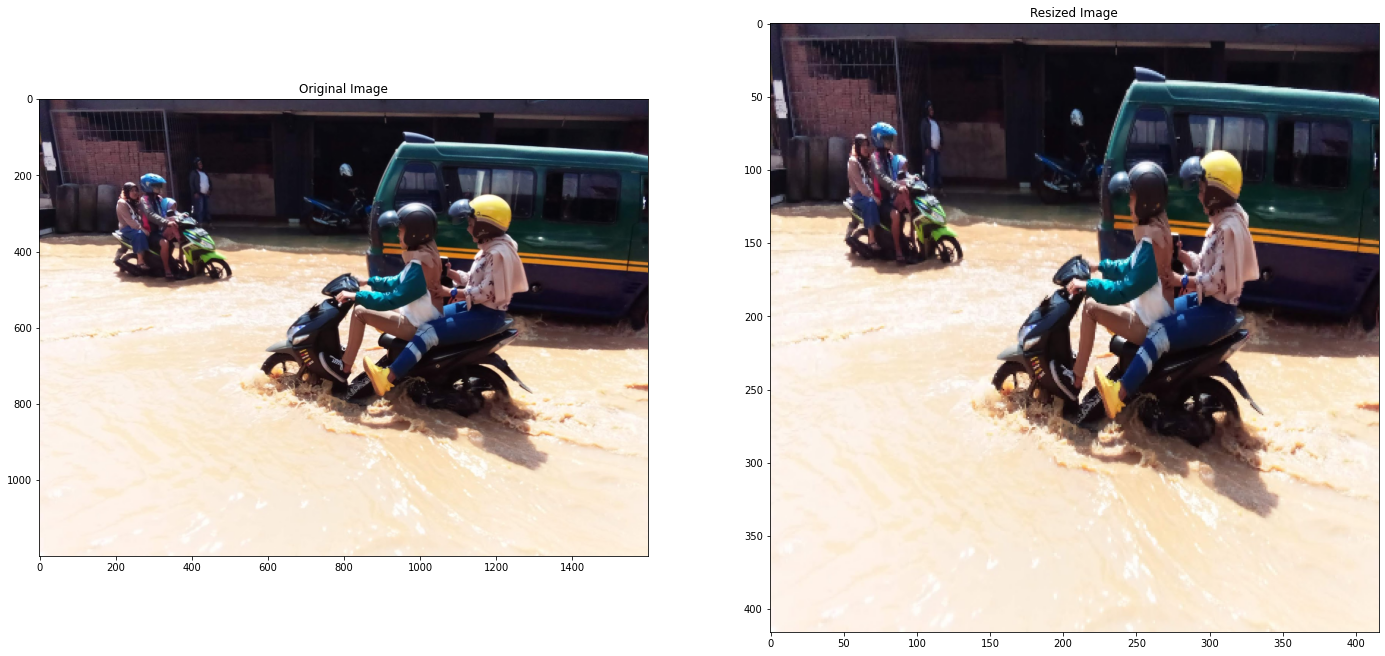

In [ ]:
plt.rcParams['figure.figsize'] = [24.0, 14.0] # Set ukuran figur asli
img = cv2.imread('./images/majalaya.jpg') # Load gambar yang akan di ubah
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # merubah gambar menjadi RGB   
resized_image = cv2.resize(original_image, (m.width, m.height)) # mengubah ukuran gambar ke lebar dan tinggi input dari first layer network
# Penampilan gambar
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

In [ ]:
# Set the NMS threshold
nms_thresh = 0.6  

In [ ]:
# Set the IOU threshold
iou_thresh = 0.4



It took 1.102 seconds to detect the objects in the image.

Number of Objects Detected: 9 

Objects Found and Confidence Level:

1. orang: 1.000000
2. orang: 0.999999
3. orang: 1.000000
4. orang: 0.999995
5. motor: 0.999403
6. mobil: 0.910784
7. motor: 0.999967
8. motor: 0.999994
9. orang: 0.999989


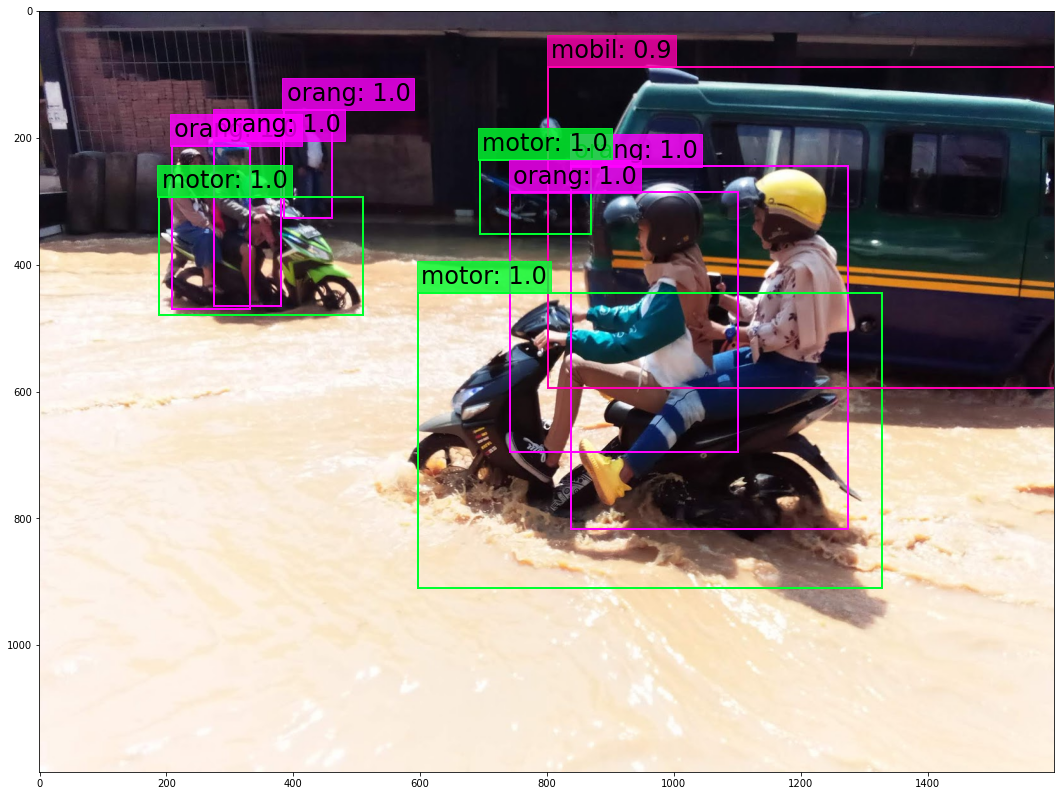

In [ ]:
plt.rcParams['figure.figsize'] = [24.0, 14.0] # Set default ukuran figure
img = cv2.imread('./images/majalaya.jpg') # Load gambar
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # konversi gambar menjadi RGB    
resized_image = cv2.resize(original_image, (m.width, m.height)) # mengubah ukuran gambar ke lebar dan tinggi input dari first layer network
iou_thresh = 0.4 # Set IOU threshold. Default value 0.4
nms_thresh = 0.6 # Set NMS threshold. Default value 0.6
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh) # deteksi objects didalam gambar
print_objects(boxes, class_names) # Print objects yang tertangkap dan confidence level
plot_boxes(original_image, boxes, class_names, plot_labels = True) # Plot gambar dengan bounding boxes dan corresponding object class labels